## Bibliotecas

In [2]:
# !pip install wordcloud
# !pip install seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud, ImageColorGenerator
import seaborn as sns

# Definir o tema pastel no Seaborn
sns.set_palette("pastel") 

## Ingestão

In [4]:
df_medidas = pd.read_excel('./dados/BD_Disjuntores.xlsx', sheet_name='Documentos de Medida')

In [5]:
df_cadastro =  pd.read_excel('./dados/BD_Disjuntores.xlsx', sheet_name='Cadastro')
df = pd.merge(df_cadastro, df_medidas, how='left', on='Equipamento', )
df = df.dropna(subset=['LimInfIntMed.','LimSupIntMed.'], how='any')
df.head()

,Equipamento,Fabricante,Modelo,Dt.entr.serviço,Classe,Ano construção,Código ABC,Tensão,Tipo Instalação,Ponto medição,...,Data,Valor teórico,LimInfIntMed.,LimSupIntMed.,ValMed/PosTCont,Unid.caracter.,Cód.valorização,Txt.code codif.,Denominação,Texto
20,270715,GENERAL ELECTRIC,GL314P,2019-09-07,S_DISJ_SF6,2017,C,230.0,Bay de Linha,9758426.0,...,2024-03-08,9.0,8.1,10.8,7.0,A,NaN,NaN,Corrente de Alimentação Motor Fase A,NaN
21,270715,GENERAL ELECTRIC,GL314P,2019-09-07,S_DISJ_SF6,2017,C,230.0,Bay de Linha,9758426.0,...,2021-11-24,9.0,8.1,10.8,9.6,A,NaN,NaN,Corrente de Alimentação Motor Fase A,NaN
22,270715,GENERAL ELECTRIC,GL314P,2019-09-07,S_DISJ_SF6,2017,C,230.0,Bay de Linha,9758427.0,...,2024-03-08,9.0,8.1,10.8,7.0,A,NaN,NaN,Corrente de Alimentação Motor Fase B,NaN
23,270715,GENERAL ELECTRIC,GL314P,2019-09-07,S_DISJ_SF6,2017,C,230.0,Bay de Linha,9758427.0,...,2021-11-24,9.0,8.1,10.8,9.6,A,NaN,NaN,Corrente de Alimentação Motor Fase B,NaN
24,270715,GENERAL ELECTRIC,GL314P,2019-09-07,S_DISJ_SF6,2017,C,230.0,Bay de Linha,9758428.0,...,2024-03-08,9.0,8.1,10.8,7.0,A,NaN,NaN,Corrente de Alimentação Motor Fase V,NaN


## Análise Exploratória

In [6]:
len(df_cadastro['Equipamento'].unique()), len(df_medidas['Equipamento'].unique())

(2827, 2663)

In [7]:
df_cadastro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2827 entries, 0 to 2826
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Equipamento      2827 non-null   int64         
 1   Fabricante       2827 non-null   object        
 2   Modelo           2810 non-null   object        
 3   Dt.entr.serviço  2826 non-null   datetime64[ns]
 4   Classe           2827 non-null   object        
 5   Ano construção   2827 non-null   int64         
 6   Código ABC       2827 non-null   object        
 7   Tensão           2827 non-null   float64       
 8   Tipo Instalação  2827 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 198.9+ KB


In [8]:
df2 = pd.merge(df_medidas, df_cadastro, how='left', on='Equipamento')
df2['Fabricante'].isna().any()

True

In [9]:
df2[df2['Fabricante'].isna()].head()

,Equipamento,Ponto medição,Doc.medição,Data,Valor teórico,LimInfIntMed.,LimSupIntMed.,ValMed/PosTCont,Unid.caracter.,Cód.valorização,...,Denominação,Texto,Fabricante,Modelo,Dt.entr.serviço,Classe,Ano construção,Código ABC,Tensão,Tipo Instalação
18,467509,467492,732683,2015-09-27,1.0,0.0,1.0,0.29,%,NaN,...,Fator de Potencia Bucha B2 Fase A,Ensaio realizado 12/05/2009,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN


In [10]:
del df2
del df_medidas, df_cadastro

In [11]:
df[['Tensão', 'Dt.entr.serviço', 'Ano construção', 'Data', 'Valor teórico', 'LimInfIntMed.', 'LimSupIntMed.', 'ValMed/PosTCont']].describe()

,Tensão,Ano construção,Valor teórico,LimInfIntMed.,LimSupIntMed.,ValMed/PosTCont
count,70128.000000,70128.000000,69933.000000,70128.000000,7.012800e+04,7.012800e+04
mean,256.036540,1997.065865,1767.829248,1752.475444,1.079611e+06,6.323247e+04
std,165.059754,17.423853,15512.229200,15491.489886,1.033351e+07,4.703025e+06
min,6.600000,1947.000000,-21.000000,-60.000000,-1.500000e+01,-6.000000e+01
25%,138.000000,1979.000000,12.000000,8.100000,1.440000e+01,1.637500e+01
50%,230.000000,2004.000000,33.500000,28.000000,4.000000e+01,3.500000e+01
75%,440.000000,2011.000000,65.000000,58.500000,9.000000e+01,6.680000e+01
max,550.000000,2024.000000,150000.000000,150000.000000,1.000000e+08,6.210000e+08


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70128 entries, 20 to 143162
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Equipamento      70128 non-null  int64         
 1   Fabricante       70128 non-null  object        
 2   Modelo           70128 non-null  object        
 3   Dt.entr.serviço  70120 non-null  datetime64[ns]
 4   Classe           70128 non-null  object        
 5   Ano construção   70128 non-null  int64         
 6   Código ABC       70128 non-null  object        
 7   Tensão           70128 non-null  float64       
 8   Tipo Instalação  70128 non-null  object        
 9   Ponto medição    70128 non-null  float64       
 10  Doc.medição      70128 non-null  float64       
 11  Data             70128 non-null  datetime64[ns]
 12  Valor teórico    69933 non-null  float64       
 13  LimInfIntMed.    70128 non-null  float64       
 14  LimSupIntMed.    70128 non-null  flo

In [13]:
df_gpd_equipamento = df.groupby('Equipamento').agg({
    'Ponto medição': 'nunique',
    'Data': 'nunique',
})
df_gpd_equipamento.head()

,Ponto medição,Data
Equipamento,,
127874,16,9
127875,8,2
127876,87,3
127878,8,4
127880,30,3


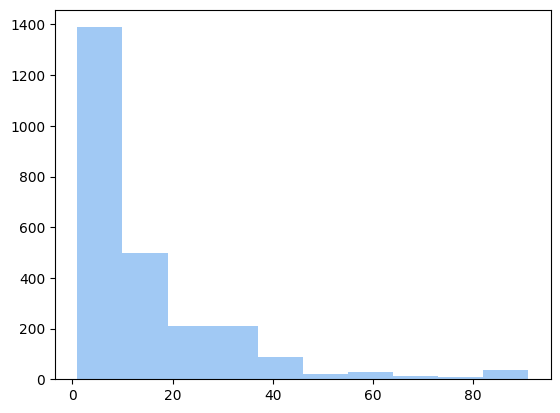

In [14]:
plt.hist(df_gpd_equipamento['Ponto medição'])
plt.show()

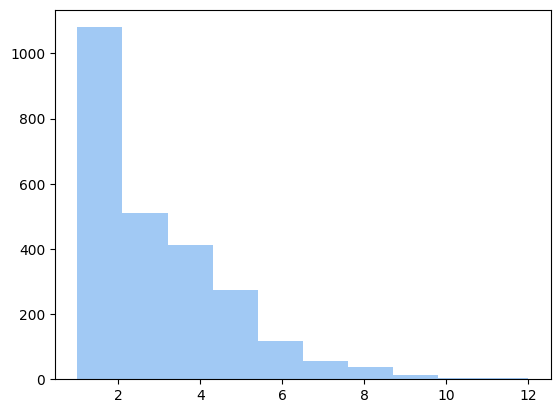

In [15]:
plt.hist(df_gpd_equipamento['Data'])
plt.show()

In [16]:
df_qualificacao = df[df['Denominação'] == 'Qualificacao do Equipamento']
len(df_qualificacao['Equipamento'].unique())

33

In [17]:
df_qlfc_gpd = df_qualificacao[['Equipamento', 'Data']].groupby('Equipamento').nunique()
df_qlfc_gpd.describe()

,Data
count,33.0
mean,3.0
std,0.0
min,3.0
25%,3.0
50%,3.0
75%,3.0
max,3.0


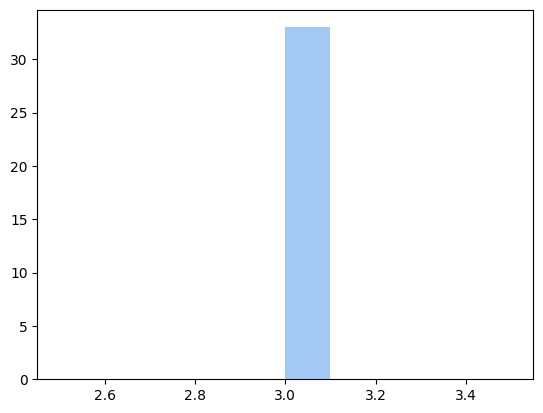

In [18]:
plt.hist(df_qlfc_gpd['Data'])
plt.show()

In [19]:
df_qlfc_gpd = df_qualificacao[['Equipamento', 'ValMed/PosTCont']].groupby('ValMed/PosTCont').nunique()
df_qlfc_gpd.describe()

,Equipamento
count,3.0
mean,17.0
std,16.0
min,1.0
25%,9.0
50%,17.0
75%,25.0
max,33.0


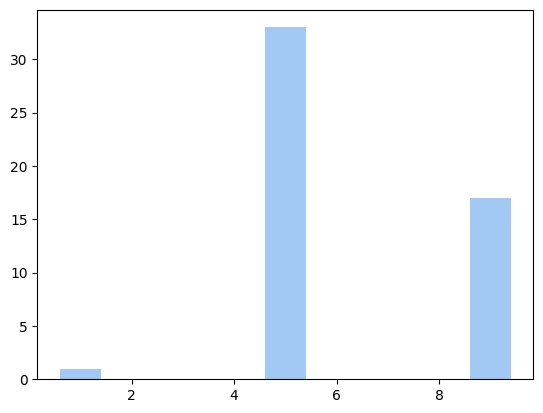

In [20]:
plt.bar(df_qlfc_gpd.index, df_qlfc_gpd['Equipamento'])
plt.show()

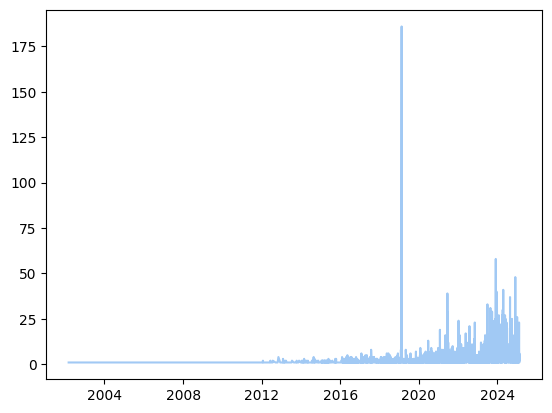

In [21]:
df_gpd_data = df.groupby('Data').agg({'Equipamento': 'nunique'})
plt.plot(df_gpd_data.index, df_gpd_data['Equipamento'])
plt.show()

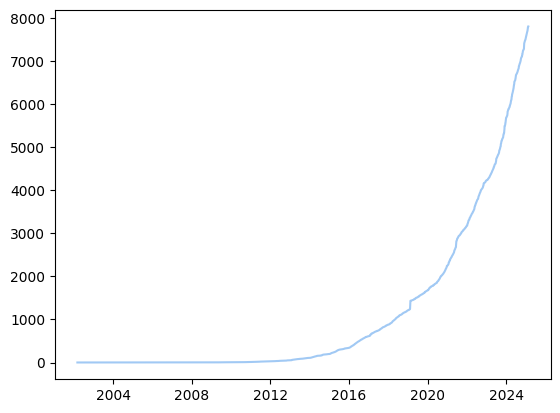

In [22]:
plt.plot(df_gpd_data.index, df_gpd_data['Equipamento'].cumsum())
plt.show()

In [23]:
df['Texto'].str.isnumeric().sum()

49577

In [24]:
df['Denominação'].unique()

array(['Corrente de Alimentação Motor Fase A',
       'Corrente de Alimentação Motor Fase B',
       'Corrente de Alimentação Motor Fase V',
       'Tempo de Abertura Camara 1 Fase A',
       'Tempo de Abertura Camara 1 Fase B',
       'Tempo de Abertura Camara 1 Fase V',
       'Tempo de Fechamento Camara 1 Fase A',
       'Tempo de Fechamento Camara 1 Fase B',
       'Tempo de Fechamento Camara 1 Fase V', 'Severidade Termografica',
       'Pressão do Meio de Extinção',
       'Corrente de Alimentação Motor Trifásico',
       'Capacitancia Capacitor Camara 1 Fase A',
       'Capacitancia Capacitor Camara 1 Fase B',
       'Capacitancia Capacitor Camara 1 Fase V',
       'Capacitancia Capacitor Camara 2 Fase A',
       'Capacitancia Capacitor Camara 2 Fase B',
       'Capacitancia Capacitor Camara 2 Fase V',
       'Capacitancia Capacitor Camara 3 Fase A',
       'Capacitancia Capacitor Camara 3 Fase B',
       'Capacitancia Capacitor Camara 3 Fase V',
       'Capacitancia Capacitor Ca

In [25]:
len(df['Denominação'].unique())

238

In [26]:
df['Texto'].unique()

array([nan, '5', '2', '3', 'BAIXA PRESSÃO 1º GRAU  - N2 1001557', '1',
       '94', 'Corrente Normial D.C.', 'Corrente Nomimal D.C.',
       'manutenção em 12/07/2017', 'pressão nominal disj. é 8 kgf',
       'manutenção 24/02/2016', 'manutenção 25/02/2016',
       'manutenção parcial 11/01/2016', '96', 'Saneamento Contadores',
       'Leitura de Dez/2020', 'Oleo isolante  substituido ( novo )',
       'Oleo isolante  substituido', 'Fechamento mensal ref. 01/2025',
       'Fechamento mensal ref. 12/2024.',
       'Fechamento mensal ref. 112024.', 'subst. Fase branca 1- 0.033%',
       'Valor de Placa - Nominal 9A', 'Valor de placa - Nominal 9A',
       'Valor de plana - Nominal 9A', '95', 'MPP DJ 52-10',
       'Registrado conforme Regional', 'MPP',
       'FECHAMENTO MENSAL JAN/2024', 'FECHAMENTO MENSAL DEZ/2023',
       'FECHAMENTO MENSAL NOV/2023', 'Sem relé', 'Adicionado 1.75kg SF6',
       '16', 'Leitura Junho/24', 'Fechamento Mensal 05/04/2023',
       'Valor encontrado em MPP',


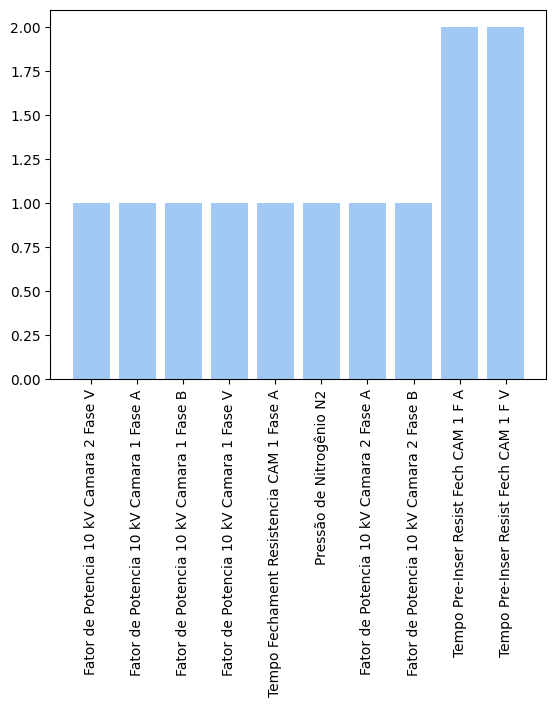

In [27]:
df_den_gpd = df[['Denominação', 'Doc.medição']].groupby('Denominação').nunique().sort_values('Doc.medição')
plt.bar(df_den_gpd.index[:10], df_den_gpd.iloc[:10, 0])
plt.xticks(rotation=90)
plt.show()

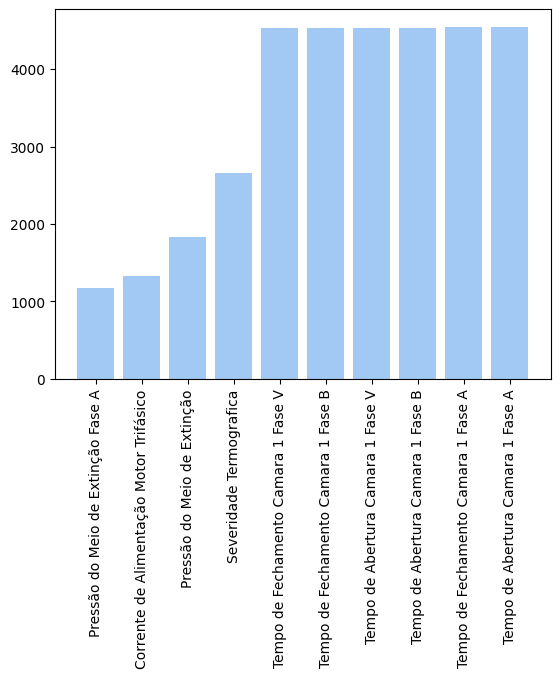

In [28]:
plt.bar(df_den_gpd.index[-10:], df_den_gpd.iloc[-10:, 0])
plt.xticks(rotation=90)
plt.show()

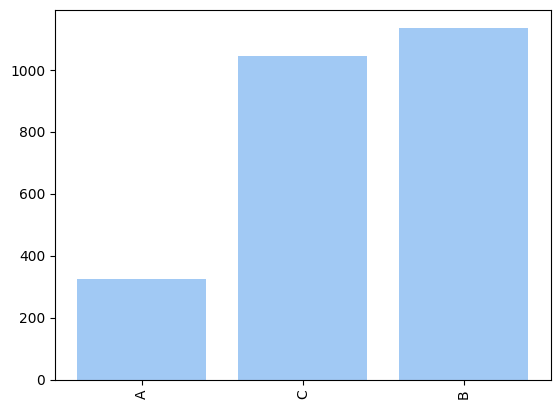

In [29]:
df_crit_gpd = df[['Código ABC', 'Equipamento']].groupby('Código ABC').nunique().sort_values('Equipamento')
plt.bar(df_crit_gpd.index, df_crit_gpd['Equipamento'])
plt.xticks(rotation=90)
plt.show()

### WordCloud

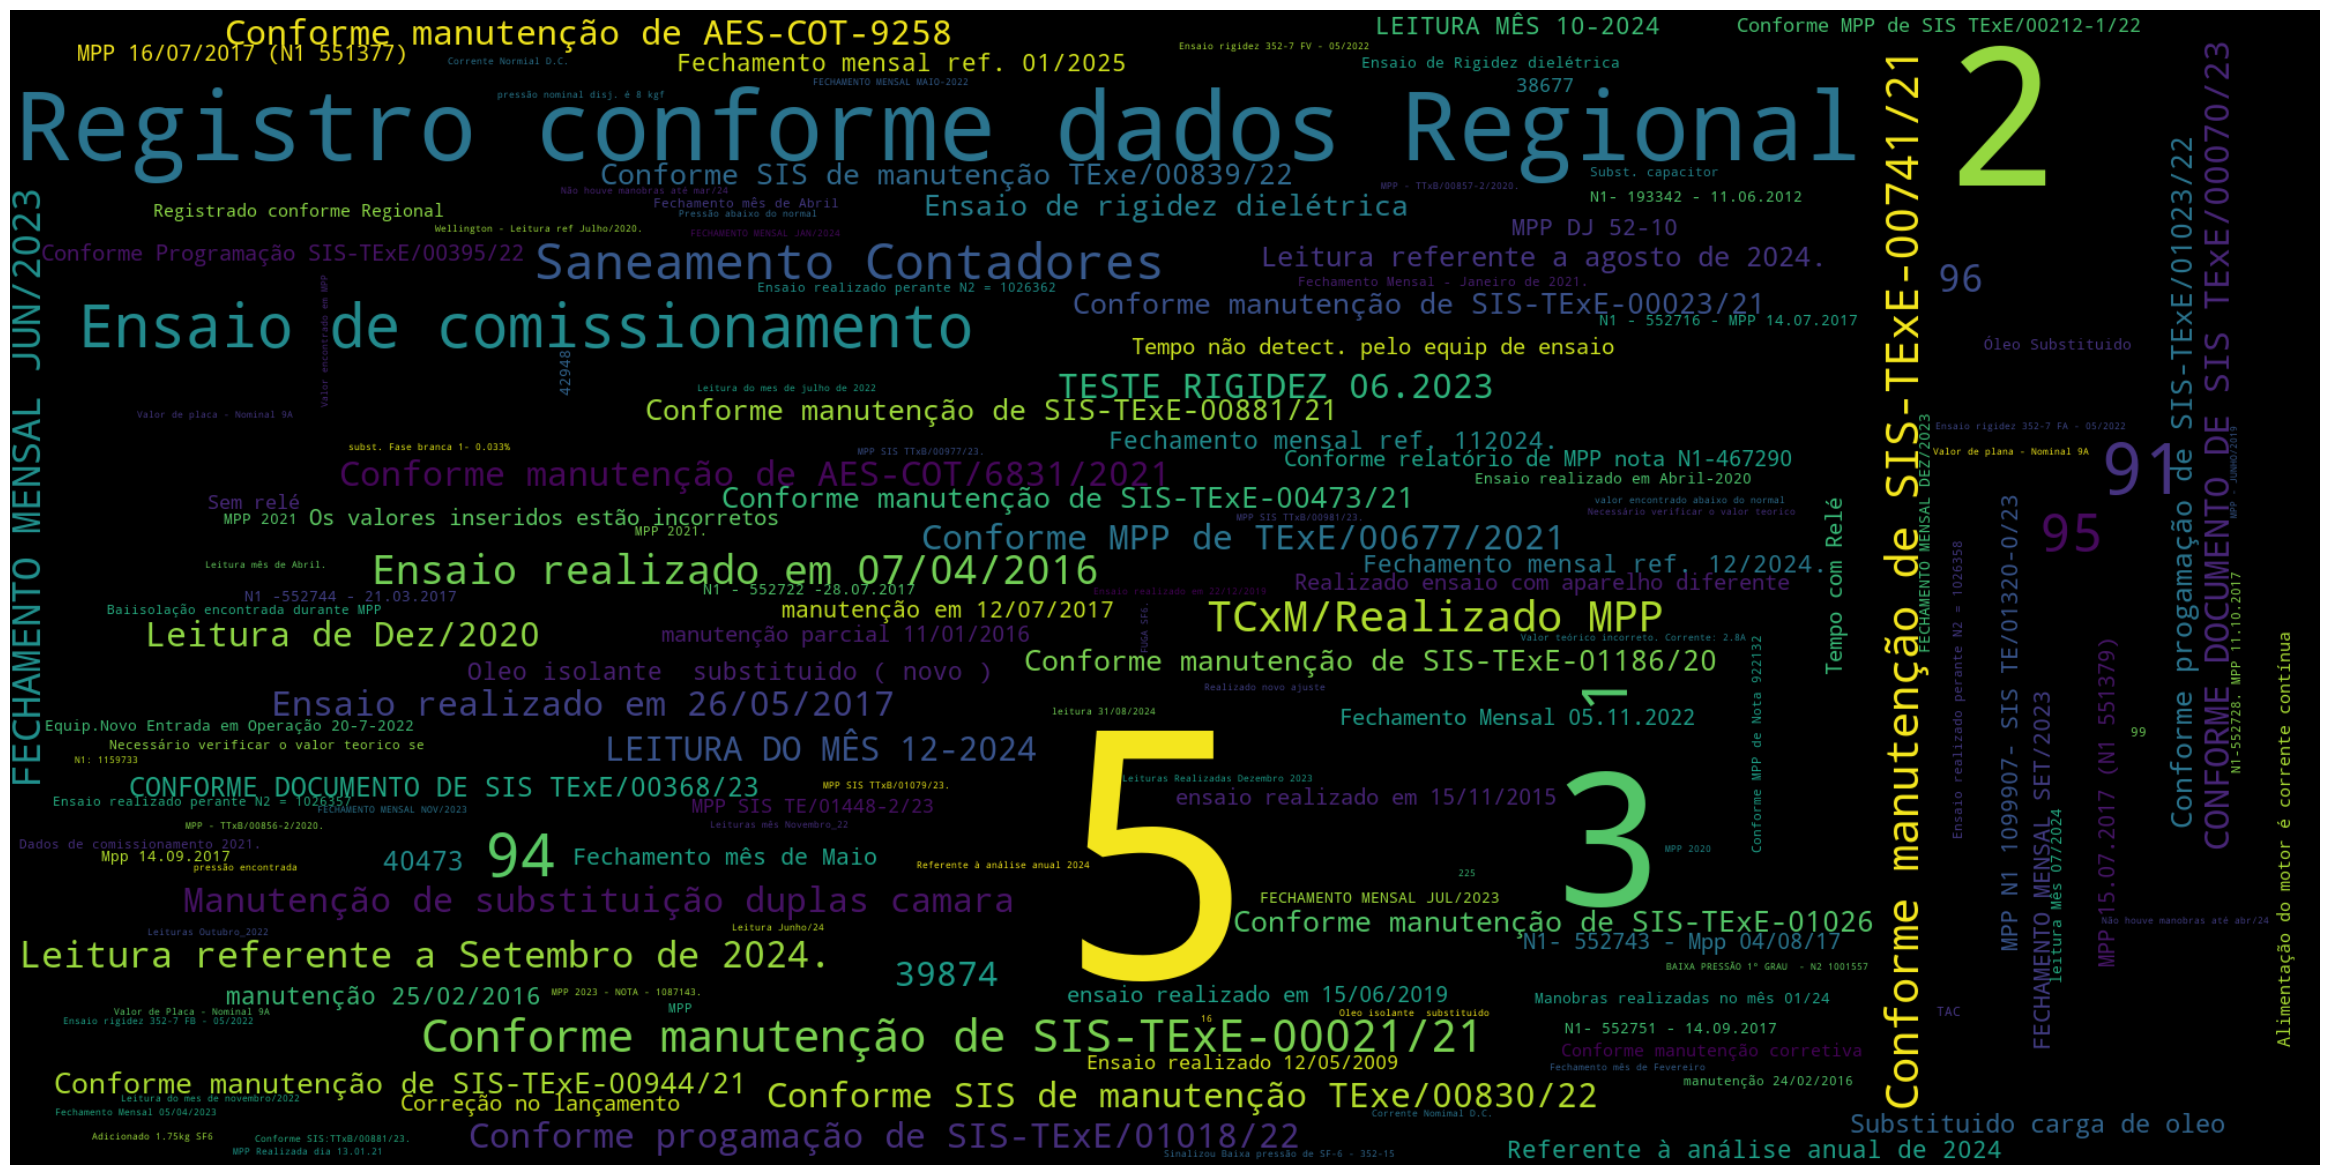

In [30]:
teste = df['Texto'].value_counts().reset_index()
teste.columns = ['Texto', 'Total']

d = {}
for Texto, Total in teste.values:
    d[Texto] = Total

wordcloud = WordCloud(width=2000, height=1000, max_font_size=300)#, background_color="white")
wordcloud.generate_from_frequencies(frequencies=d)

plt.figure(figsize=(30, 15))  # Tamanho maior do gráfico
plt.imshow(wordcloud, interpolation='bilinear')  # Plota a imagem com interpolação
plt.axis('off')  # Remove as bordas
plt.show()  # Exibe a WordCloud

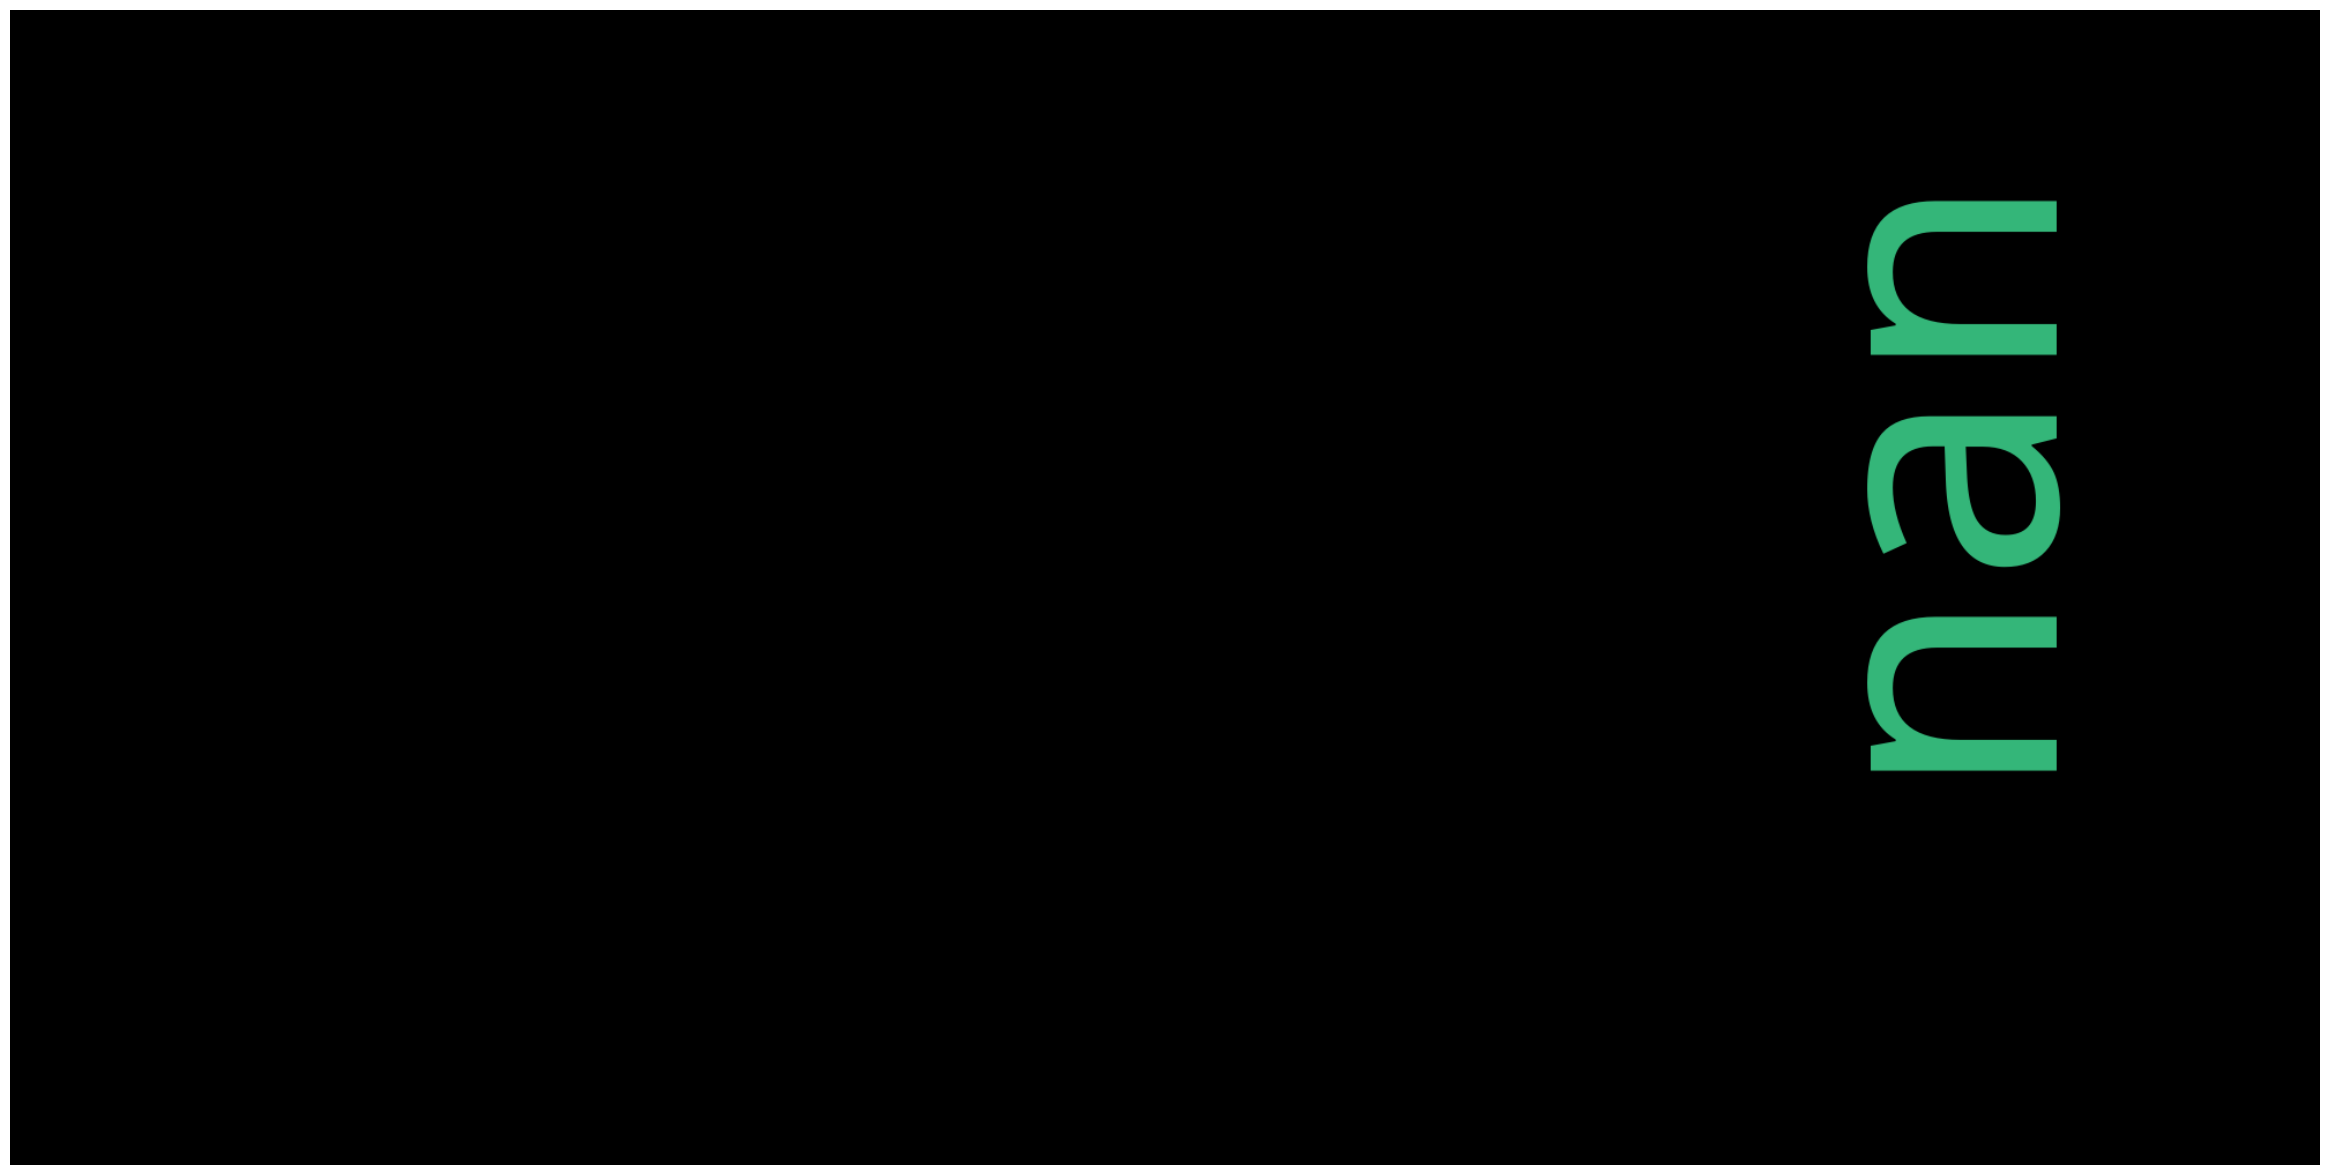

In [31]:
teste = df['Cód.valorização'].astype(str).value_counts().reset_index()
teste.columns = ['Texto', 'Total']

d = {}
for Texto, Total in teste.values:
    d[Texto] = Total

wordcloud = WordCloud(width=2000, height=1000, max_font_size=300)#, background_color="white")
wordcloud.generate_from_frequencies(frequencies=d)

plt.figure(figsize=(30, 15))  # Tamanho maior do gráfico
plt.imshow(wordcloud, interpolation='bilinear')  # Plota a imagem com interpolação
plt.axis('off')  # Remove as bordas
plt.show()  # Exibe a WordCloud

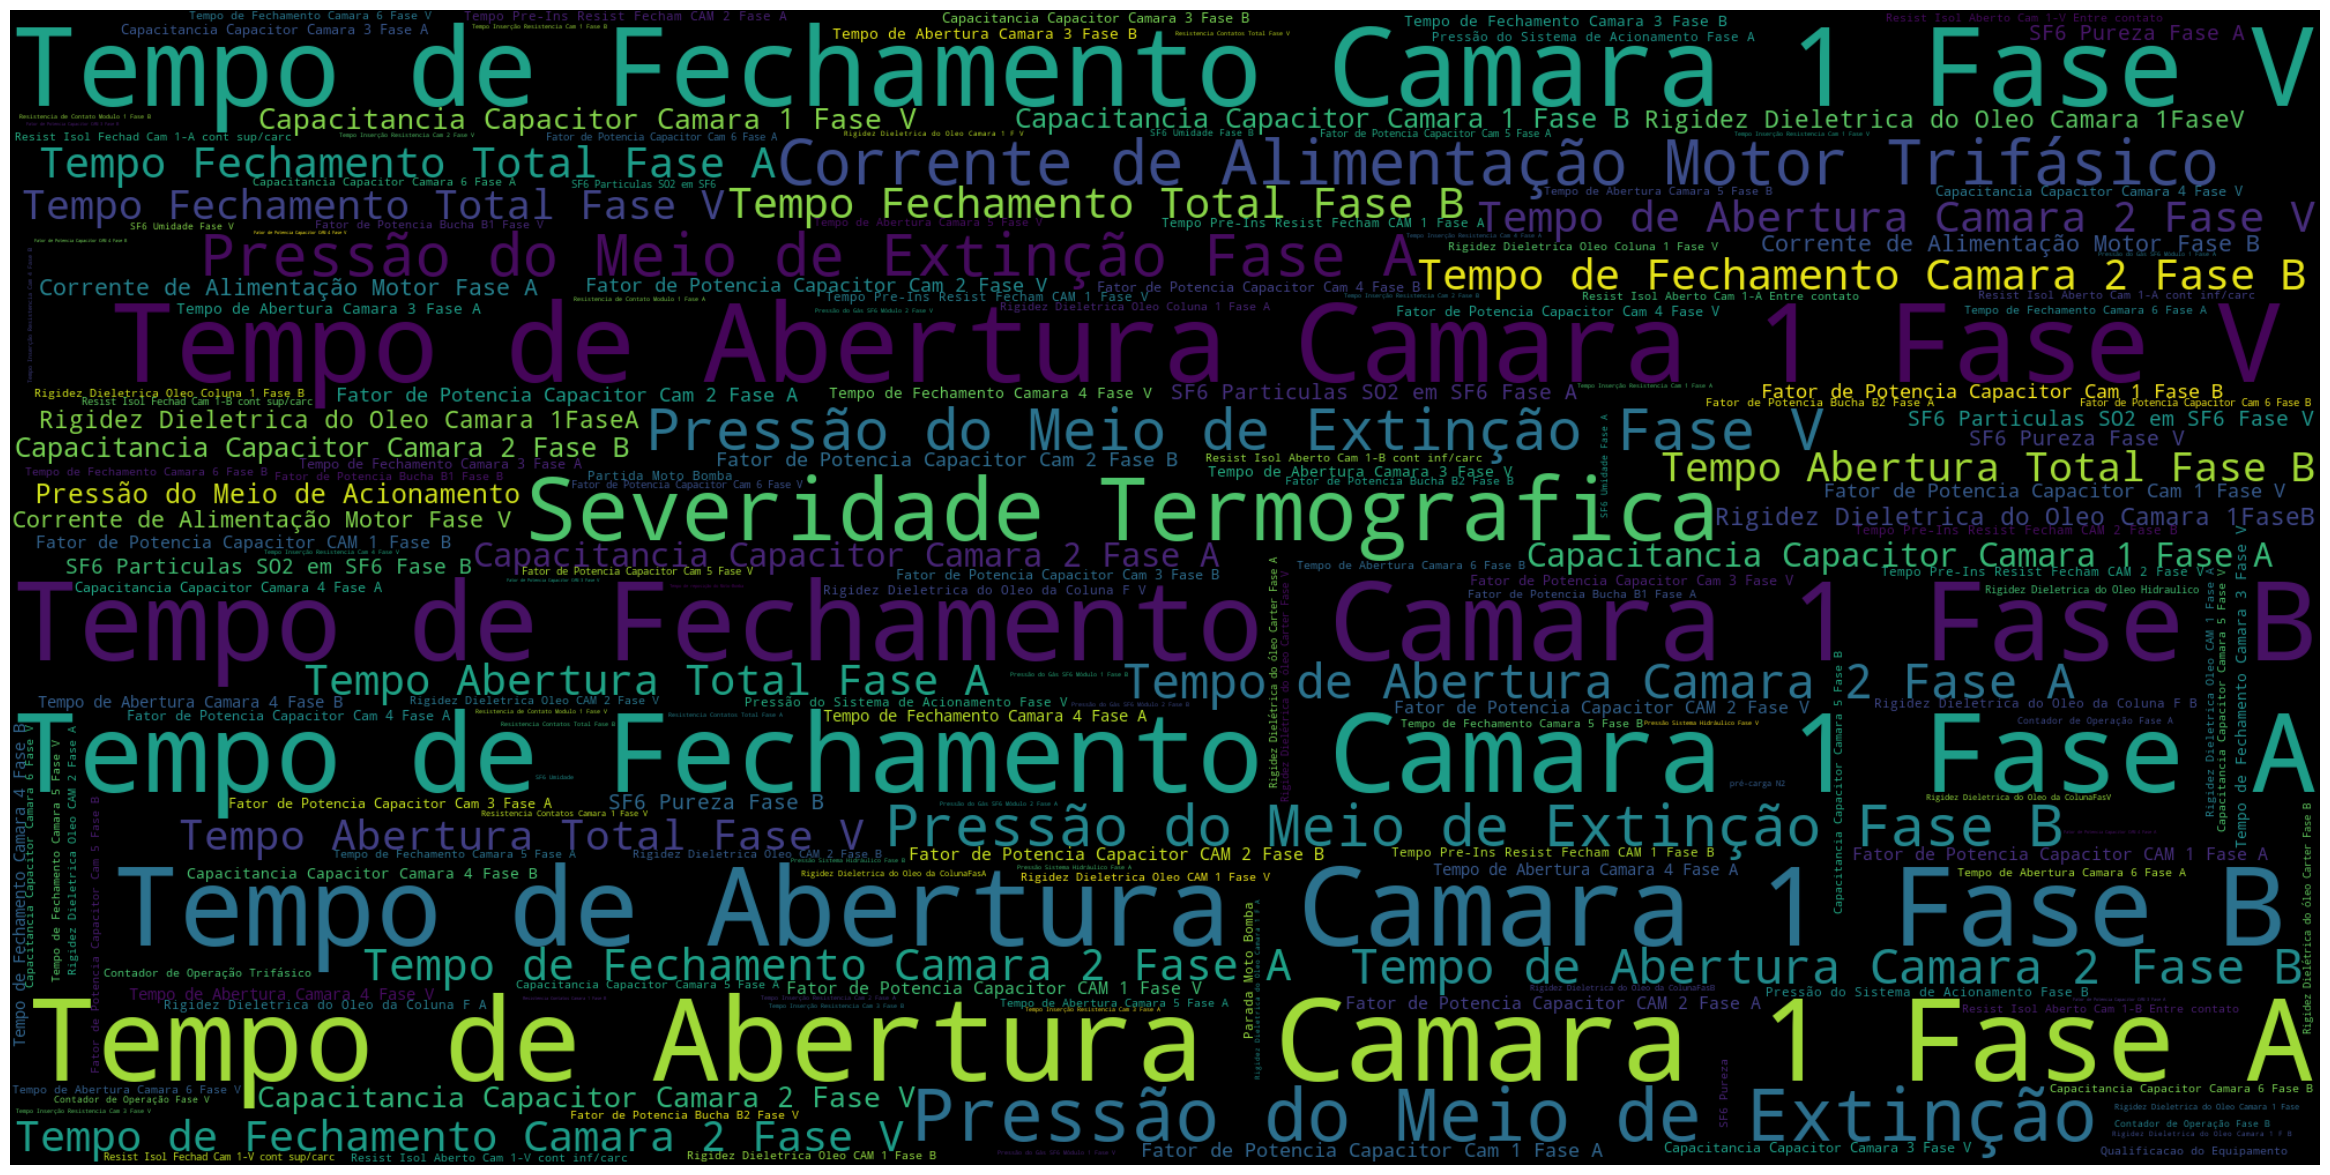

In [32]:
teste = df['Denominação'].astype(str).value_counts().reset_index()
teste.columns = ['Texto', 'Total']

d = {}
for Texto, Total in teste.values:
    d[Texto] = Total

wordcloud = WordCloud(width=2000, height=1000, max_font_size=300)#, background_color="white")
wordcloud.generate_from_frequencies(frequencies=d)

plt.figure(figsize=(30, 15))  # Tamanho maior do gráfico
plt.imshow(wordcloud, interpolation='bilinear')  # Plota a imagem com interpolação
plt.axis('off')  # Remove as bordas
plt.show()  # Exibe a WordCloud

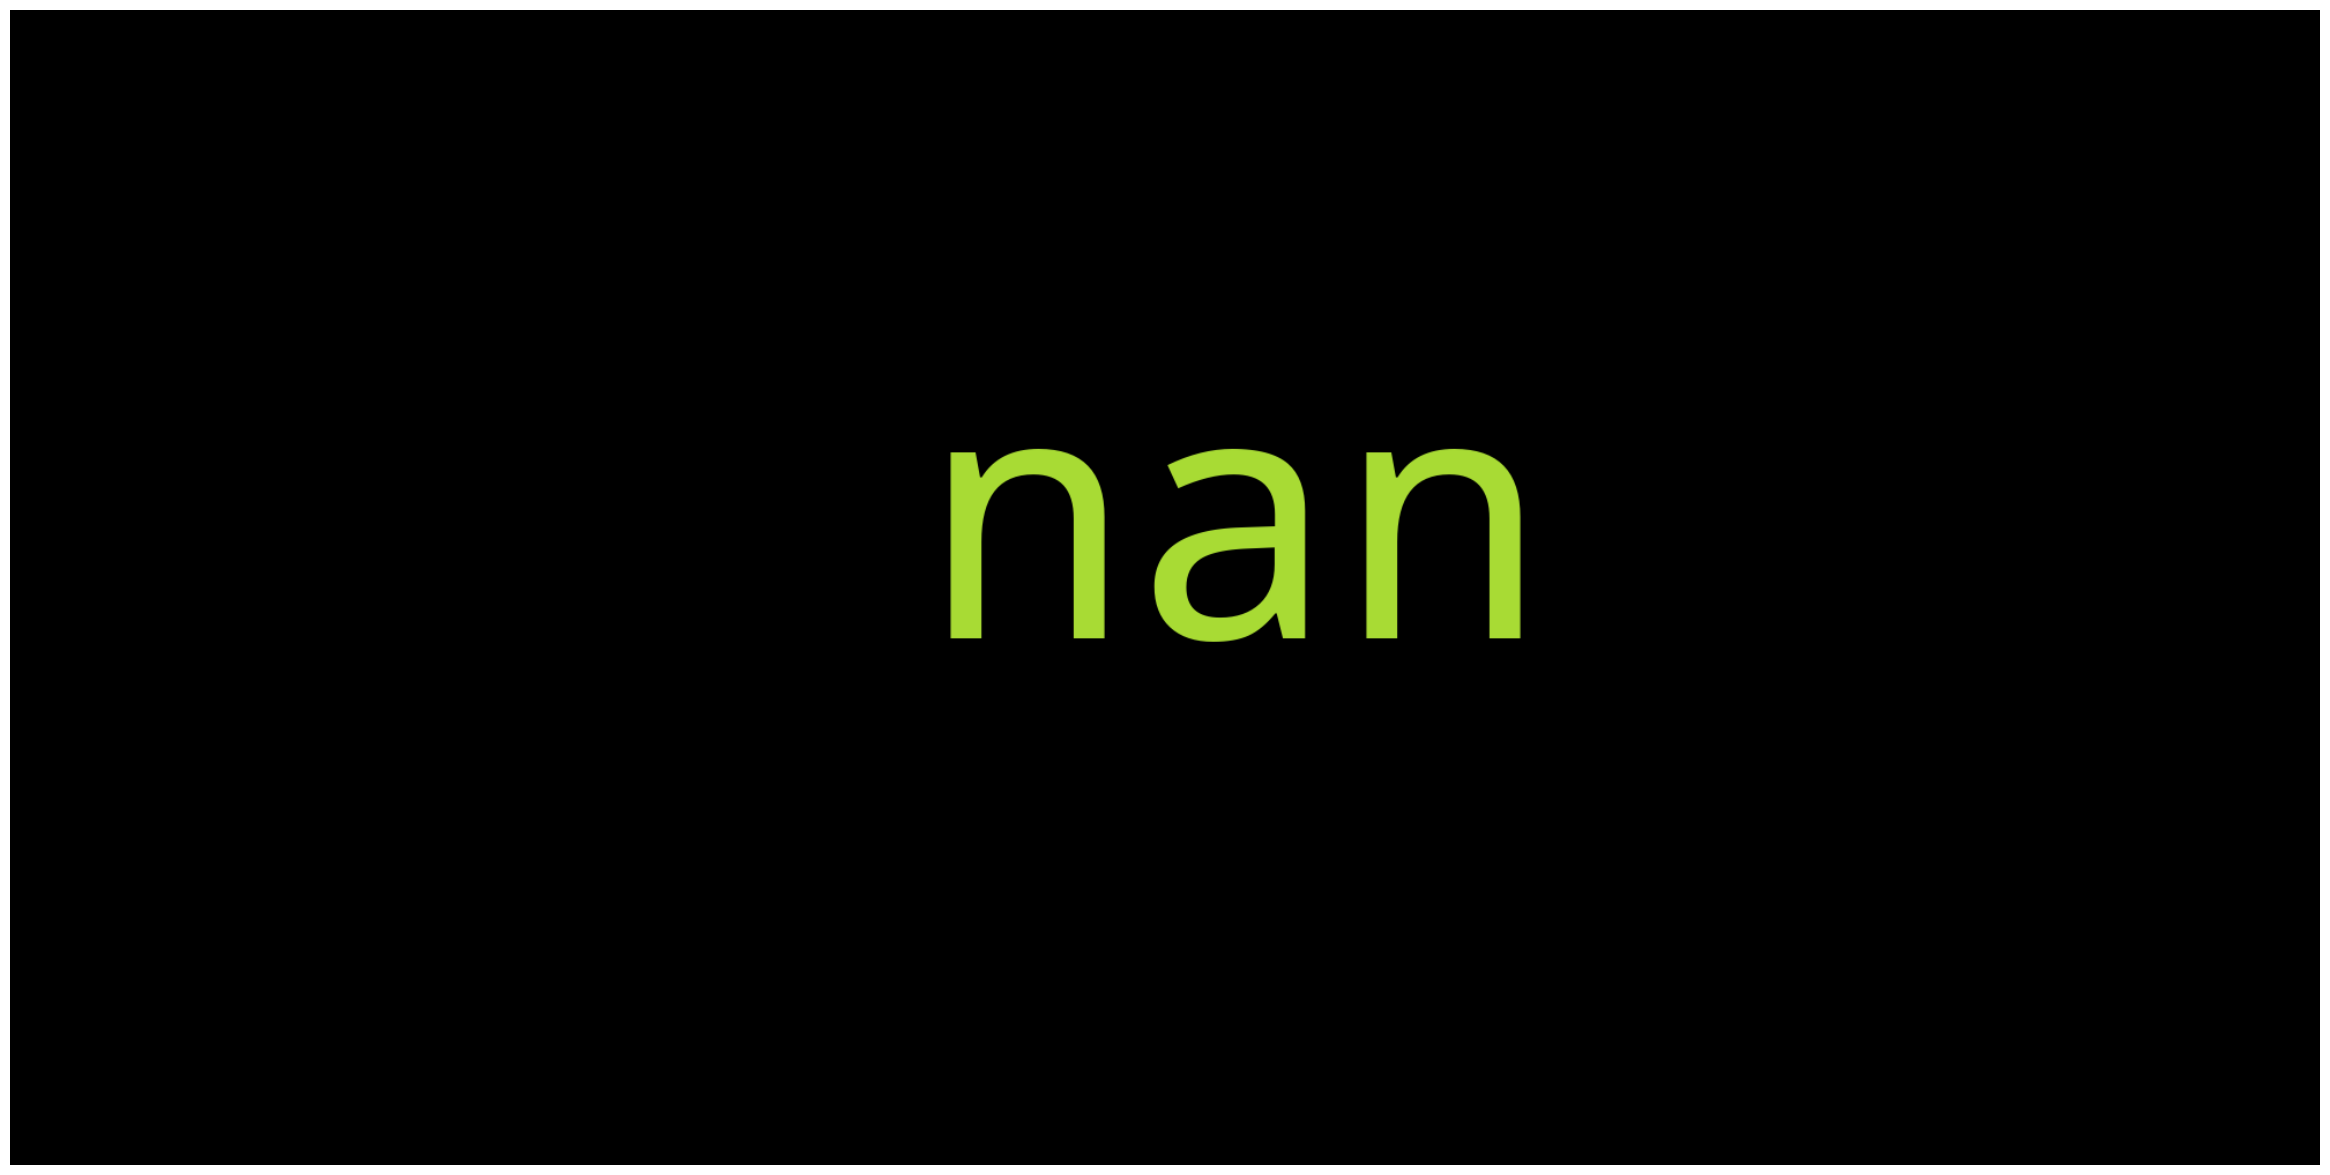

In [33]:
teste = df['Txt.code codif.'].astype(str).value_counts().reset_index()
teste.columns = ['Texto', 'Total']

d = {}
for Texto, Total in teste.values:
    d[Texto] = Total

wordcloud = WordCloud(width=2000, height=1000, max_font_size=300)#, background_color="white")
wordcloud.generate_from_frequencies(frequencies=d)

plt.figure(figsize=(30, 15))  # Tamanho maior do gráfico
plt.imshow(wordcloud, interpolation='bilinear')  # Plota a imagem com interpolação
plt.axis('off')  # Remove as bordas
plt.show()  # Exibe a WordCloud

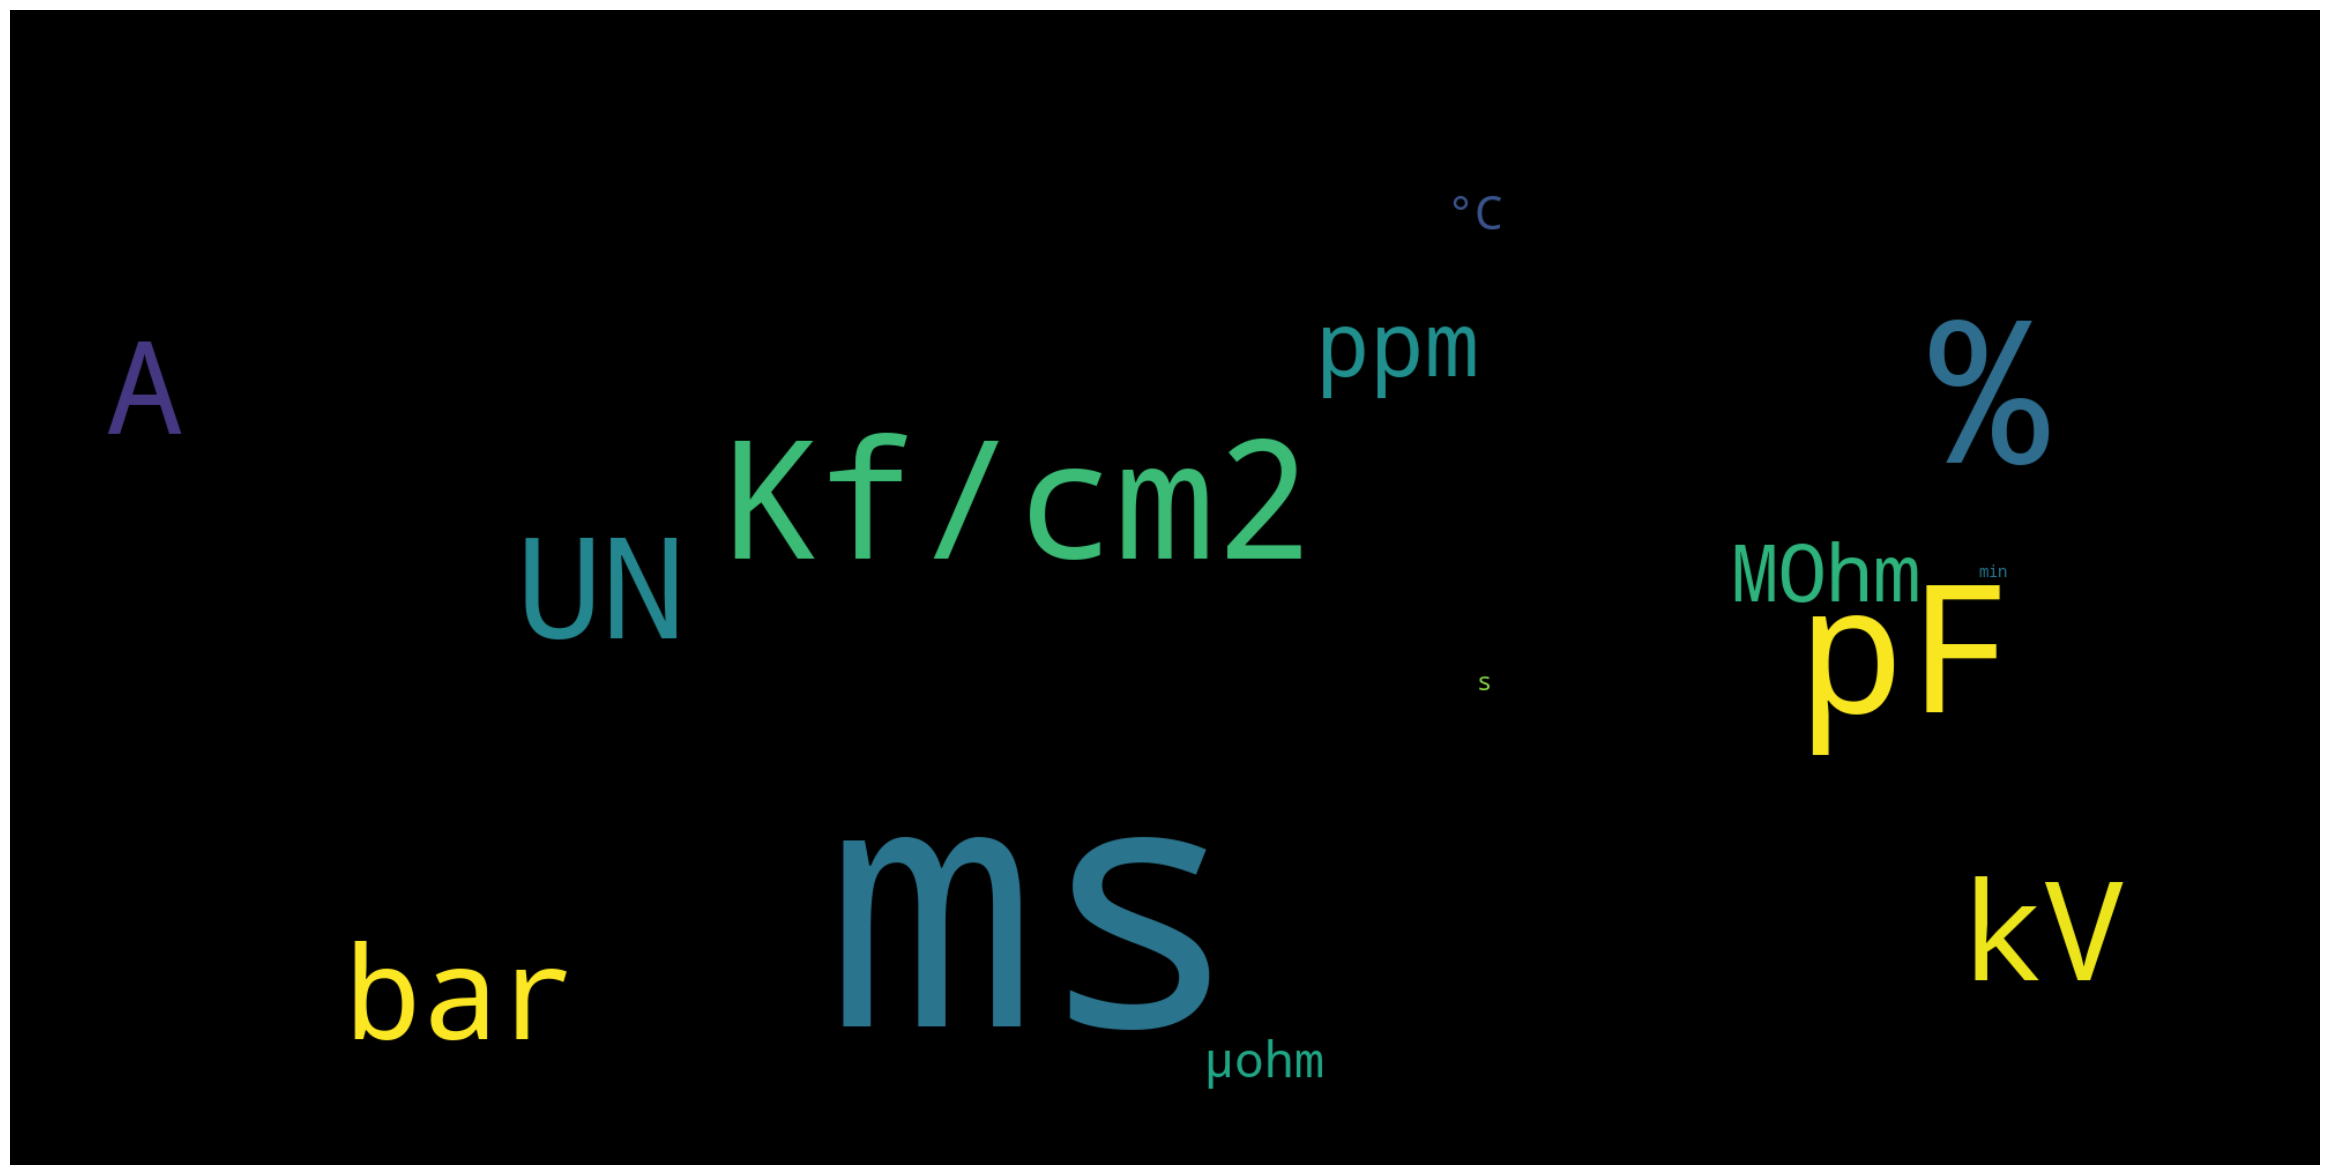

In [34]:
teste = df['Unid.caracter.'].value_counts().reset_index()
teste.columns = ['Texto', 'Total']

d = {}
for Texto, Total in teste.values:
    d[Texto] = Total

wordcloud = WordCloud(width=2000, height=1000, max_font_size=300)#, background_color="white")
wordcloud.generate_from_frequencies(frequencies=d)

plt.figure(figsize=(30, 15))  # Tamanho maior do gráfico
plt.imshow(wordcloud, interpolation='bilinear')  # Plota a imagem com interpolação
plt.axis('off')  # Remove as bordas
plt.show()  # Exibe a WordCloud